# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# y_train = y_train.flatten()

In [ ]:
# Step 5: Load Animals-10 dataset
IMG_SIZE = (224, 224) # Resize images
BATCH_SIZE = 32
animals_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical', # Multi-class classification
    shuffle=True
)

In [ ]:
print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)

(50000, 32, 32, 3)
4
uint8


In [ ]:
print(x_test.shape)
print(x_test.ndim)
print(x_test.dtype)

(10000, 32, 32, 3)
4
uint8


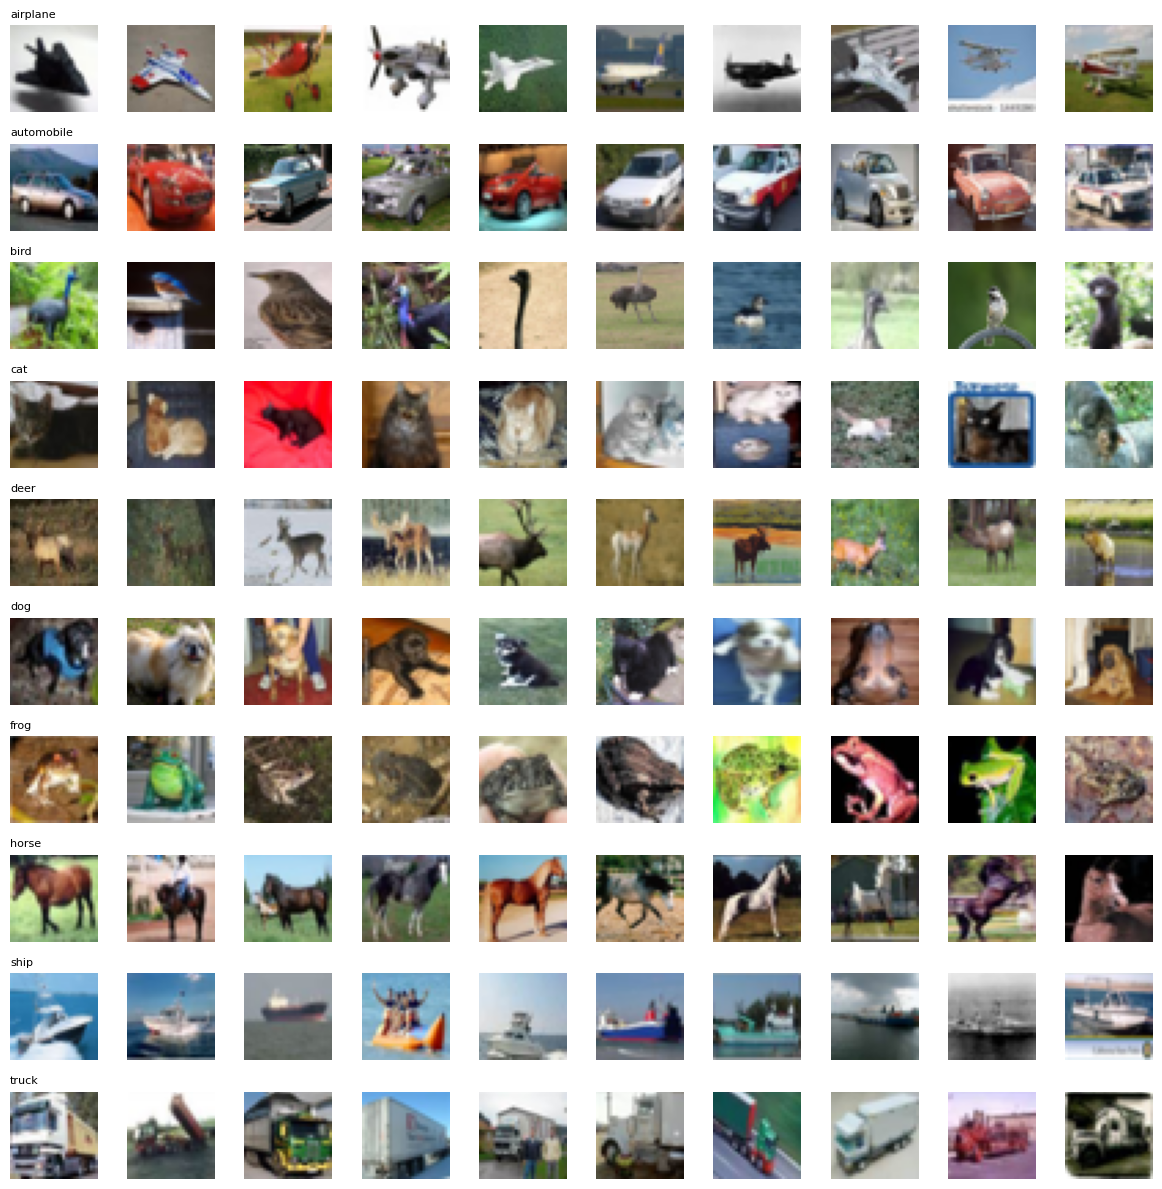

In [ ]:
#Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize 10 images per class
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i in range(10):
    # Get indices of images for class i
    indices = np.where(y_train == i)[0][:10]

    for j in range(10):
        ax = axes[i, j]
        ax.imshow(x_train[indices[j]])
        ax.axis('off')

        # Add class name as title on the first column
        if j == 0:
            ax.set_title(class_names[i], fontsize=8, loc='left')

plt.tight_layout()
plt.show()

In [ ]:
#Convert the labels to one-hot encoded form.
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



# Data Normalization (normalize the images)

X_train = x_train.astype('float32')/255
X_test = x_test.astype('float32')/255

print(X_train.shape)
print(X_test.shape)



(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
#The fourth parameter '3' in the above result represents 3 color channels RGB.
#To convert the coloured images to gray scale images by doing this
# import tensorflow as tf

# # X_train_gray = tf.image.rgb_to_grayscale(X_train)
# # X_test_gray = tf.image.rgb_to_grayscale(X_test)

# print(X_train.shape)
# print(X_test.shape)

In [ ]:
#To remove it, we can convert the coloured images to gray scale images by doing this

# import tensorflow as tf

# X_train_gray = tf.squeeze(x_train)
# X_test_gray = tf.squeeze(x_test)

# print(X_train_gray.shape)
# print(X_test_gray.shape)

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [ ]:
#To define the model import the required libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

input_shape = (32,32,3)

model = Sequential(
    [Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),

    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(100, activation='relu'),

    Dense(10, activation='softmax')
])





/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# from keras.backend import clear_session
# clear_session()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
#compile the model

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [ ]:
#train the model for 50 epochs with batch size of 512 and store the result in history


history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.2)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1020 - loss: 2.3019 - val_accuracy: 0.0958 - val_loss: 2.3029
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1001 - loss: 2.3021 - val_accuracy: 0.0957 - val_loss: 2.3029
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1039 - loss: 2.3020 - val_accuracy: 0.0960 - val_loss: 2.3028
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1011 - loss: 2.3020 - val_accuracy: 0.0957 - val_loss: 2.3030
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0972 - loss: 2.3021 - val_accuracy: 0.0975 - val_loss: 2.3043
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1022 - loss: 2.3022 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1015 - loss: 2.3020 - val_accuracy: 0.0959 - val_loss: 2.3028
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0995 - loss: 2.3020 - val_accuracy: 0.0959 - val_los

*   Plot the cross entropy loss curve and the accuracy curve

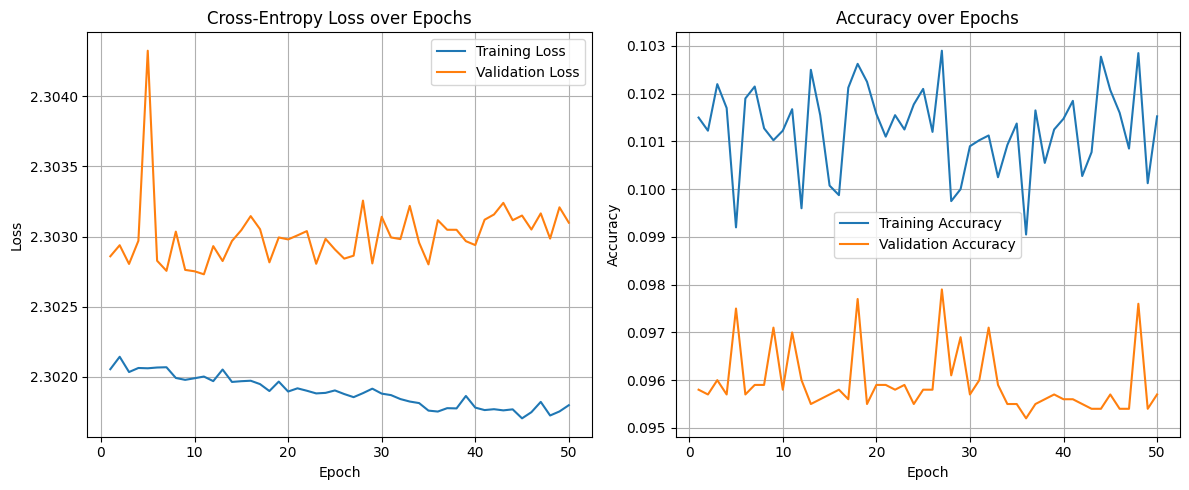

In [ ]:
# Extract values from training history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Cross-Entropy Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()





In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1006 - loss: 2.3082
Test loss: 2.309011697769165
Test accuracy: 0.10029999911785126


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
clear_session()

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
#define the model
vgg_model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),

    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])





In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
vgg_model.compile(optimizer=SGD(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:


history_vgg = vgg_model.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.2)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.1354 - loss: 2.2874 - val_accuracy: 0.1747 - val_loss: 2.2355
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2052 - loss: 2.2135 - val_accuracy: 0.2343 - val_loss: 2.1426
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2555 - loss: 2.1130 - val_accuracy: 0.2314 - val_loss: 2.1012
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2848 - loss: 2.0304 - val_accuracy: 0.1950 - val_loss: 2.1845
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3035 - loss: 1.9808 - val_accuracy: 0.2888 - val_loss: 1.9769
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3324 - loss: 1.9037 - val_accuracy: 0.2713 - val_loss: 2.0529
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3414 - loss: 1.8869 - val_accuracy: 0.3296 - val_loss: 1.8809
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3581 - loss: 1.8346 - val_accuracy: 0.3233 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


In [ ]:
acc1 = history.history['accuracy']
val_acc1 = history.history['val_accuracy']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history_vgg.history['accuracy']
val_acc2 = history_vgg.history['val_accuracy']
loss2 = history_vgg.history['loss']
val_loss2 = history_vgg.history['val_loss']

epochs = range(1, len(acc1) + 1)

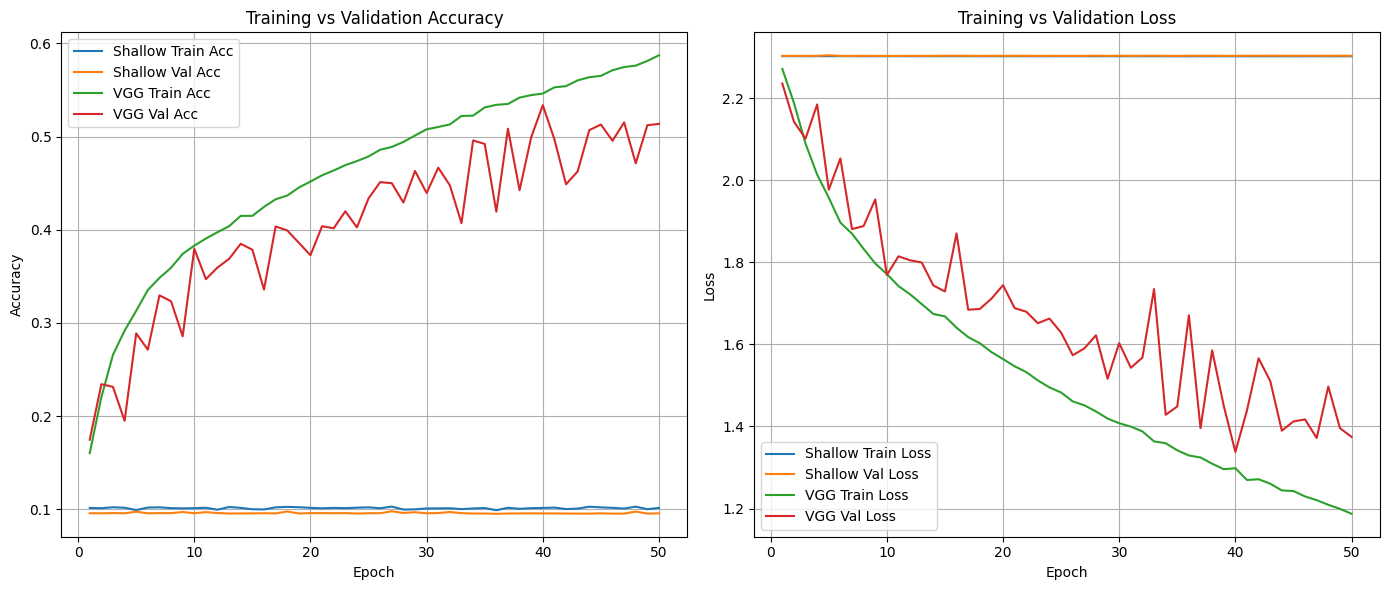

In [ ]:
# Plot Accuracy Comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc1, label='Shallow Train Acc')
plt.plot(epochs, val_acc1, label='Shallow Val Acc')
plt.plot(epochs, acc2, label='VGG Train Acc')
plt.plot(epochs, val_acc2, label='VGG Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(epochs, loss1, label='Shallow Train Loss')
plt.plot(epochs, val_loss1, label='Shallow Val Loss')
plt.plot(epochs, loss2, label='VGG Train Loss')
plt.plot(epochs, val_loss2, label='VGG Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# Predict probabilities for the test set
y_pred_probs = vgg_model.predict(x_test)  # model can be either shallow or deep model

# Convert probabilities to class labels (0 to 9)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# converting one-hot encoded test labels to class labels
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<Figure size 1000x800 with 0 Axes>

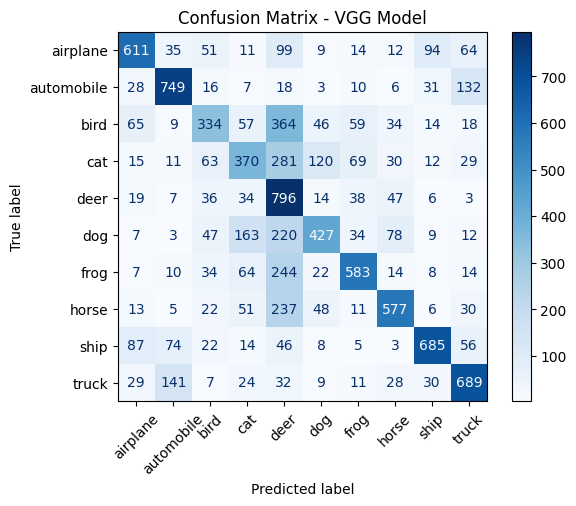

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Class names for display
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - VGG Model")
plt.grid(False)
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [ ]:
test_loss, test_accuracy = vgg_model.evaluate(x_test, y_test, verbose=0)

# Print the test accuracy
print(f"Test Accuracy for VGG Model: {test_accuracy:.4f}")

Test Accuracy for VGG Model: 0.5187


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from tensorflow.image import resize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
from keras.backend import clear_session


In [ ]:
vgg_model_cmplt = Sequential([

    # Two conv layers with 64 filters + MaxPooling
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Two conv layers with 128 filters + MaxPooling
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Two conv layers with 256 filters + MaxPooling
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Classifier
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
from keras.optimizers import SGD
from tensorflow.image import resize

# Resize images to 64x64
x_train_resized = resize(x_train, (64, 64))
x_test_resized = resize(x_test, (64, 64))


vgg_model_cmplt.compile(optimizer = SGD(learning_rate=0.01, momentum=0.9),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

vgg_model_cmplt.summary()


history_vgg_model_cmplt = vgg_model_cmplt.fit(x_train_resized, y_train,
                                      epochs=50,
                                      batch_size=512,
                                      validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 663ms/step - accuracy: 0.1371 - loss: 2.2705 - val_accuracy: 0.2548 - val_loss: 2.0825
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 359ms/step - accuracy: 0.3013 - loss: 1.9525 - val_accuracy: 0.3644 - val_loss: 1.7883
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 354ms/step - accuracy: 0.4074 - loss: 1.6793 - val_accuracy: 0.4640 - val_loss: 1.5180
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 356ms/step - accuracy: 0.4843 - loss: 1.4444 - val_accuracy: 0.4945 - val_loss: 1.4270
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 356ms/step - accuracy: 0.5177 - loss: 1.3546 - val_accuracy: 0.5382 - val_loss: 1.3050
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 363ms/step - accuracy: 0.5704 - loss: 1.2123 - val_accuracy: 0.5689 - val_loss: 1.2212
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 363ms/step - accuracy: 0.6047 - loss: 1.1155 - val_accuracy: 0.5688 - val_loss: 1.2318
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 362ms/step - accuracy: 0.6424 - loss: 1.0148 - val_accu

In [ ]:
# Predict probabilities
y_pred_probs_cmp = vgg_model_cmplt.predict(x_test_resized)

# Convert to predicted class labels
y_pred_classes_cmplt = np.argmax(y_pred_probs, axis=1)

# Convert true labels from one-hot to class labels
y_true_classes_cmplt = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


<Figure size 1000x800 with 0 Axes>

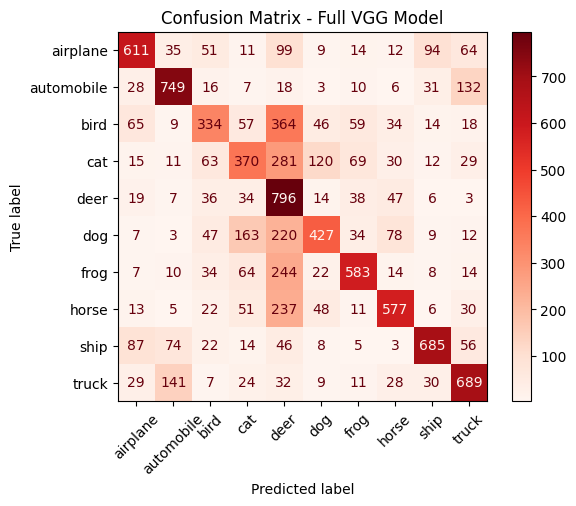

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_true_classes_cmplt, y_pred_classes_cmplt)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Reds', xticks_rotation=45)
plt.title("Confusion Matrix - Full VGG Model")
plt.grid(False)
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
It defines the output of a neuron in a neural network based on its input.
It adds non-linearity

_

2 - Key Differences between sigmoid and softmax:
Sigmoid is used for binary or multi-label classification which gives independent probabilities between 0 and 1 for each output.

softmax is also used for multi-label classification that produces a probability distribution across classes that sums to 1
_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_


**Comment on the class confusions for the complete VGG model:**

*(Double-click or enter to edit)*

...